In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import *
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras import callbacks
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras import layers
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Force TF to use only the CPU

2022-12-09 04:34:05.420219: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras import preprocessing

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding

from keras.layers import LSTM
from keras.layers import GRU

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 5000)

In [3]:
traindf = pd.read_csv('./train.csv')
testdf = pd.read_csv('./test.csv')

In [4]:
# testdf = pd.merge(left=testdf, right=traindf[['ID', 'Segmentation']], how='left', on='ID')

In [5]:
# testdf['Segmentation'].describe()

In [6]:
# testdf['Segmentation'].fillna('D')

# data preprocessing: fillna()

ID                 False
Gender             False
Ever_Married        True
Age                False
Graduated           True
Profession          True
Work_Experience     True
Spending_Score     False
Family_Size         True
Var_1               True
Segmentation       False
dtype: bool


<AxesSubplot:>

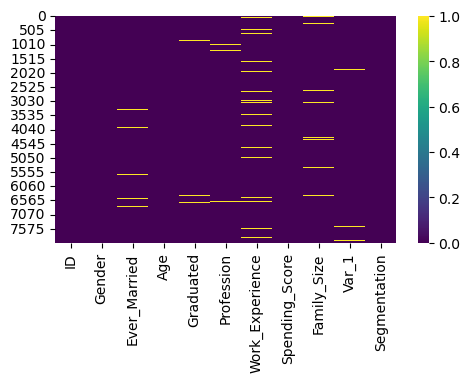

In [7]:
import seaborn as sns
print(traindf.isnull().any())
plt.figure(figsize=(traindf.shape[1] / 2, 3), dpi=100)
sns.heatmap(traindf.isnull(), cmap="viridis")

In [8]:
df = traindf
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation'], dtype='object')

In [9]:
df['Ever_Married'].describe()

count     7928
unique       2
top        Yes
freq      4643
Name: Ever_Married, dtype: object

In [10]:
df['Ever_Married'].fillna('Yes', inplace=True)

In [11]:
df['Graduated'].describe()

count     7990
unique       2
top        Yes
freq      4968
Name: Graduated, dtype: object

In [12]:
df['Graduated'].fillna('Yes', inplace=True)

In [13]:
df['Profession'].describe()

count       7944
unique         9
top       Artist
freq        2516
Name: Profession, dtype: object

In [14]:
df['Profession'].fillna('', inplace=True)

In [15]:
df['Work_Experience'].describe()

count    7239.000000
mean        2.641663
std         3.406763
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [16]:
df['Work_Experience'].fillna(df['Work_Experience'].mean(), inplace=True)

In [17]:
df['Spending_Score'].describe()

count     8068
unique       3
top        Low
freq      4878
Name: Spending_Score, dtype: object

In [18]:
df['Spending_Score'].fillna('Low', inplace=True)

In [19]:
df['Family_Size'].describe()

count    7733.000000
mean        2.850123
std         1.531413
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: Family_Size, dtype: float64

In [20]:
df['Family_Size'].fillna(df['Family_Size'].mean(), inplace=True)

In [21]:
df['Var_1'].describe()

count      7992
unique        7
top       Cat_6
freq       5238
Name: Var_1, dtype: object

In [22]:
df['Var_1'].fillna('Cat_6', inplace=True)

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Var_1              False
Segmentation       False
dtype: bool


<AxesSubplot:>

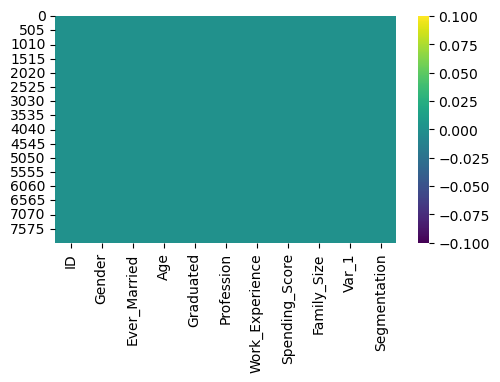

In [23]:
traindf = df
print(traindf.isnull().any())
plt.figure(figsize=(traindf.shape[1] / 2, 3), dpi=100)
sns.heatmap(traindf.isnull(), cmap="viridis")

ID                 False
Gender             False
Ever_Married        True
Age                False
Graduated           True
Profession          True
Work_Experience     True
Spending_Score     False
Family_Size         True
Var_1               True
dtype: bool


<AxesSubplot:>

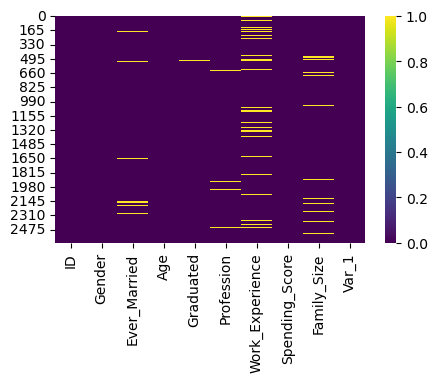

In [24]:
print(testdf.isnull().any())
plt.figure(figsize=(testdf.shape[1] / 2, 3), dpi=100)
sns.heatmap(testdf.isnull(), cmap="viridis")

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Var_1              False
Segmentation       False
dtype: bool


<AxesSubplot:>

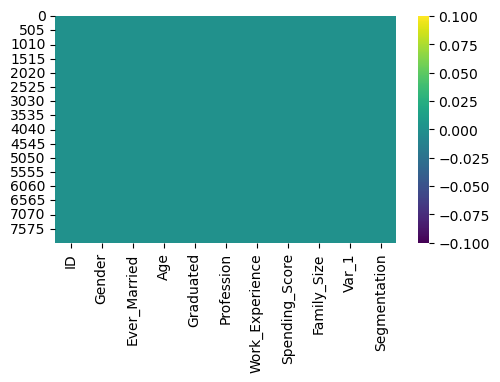

In [25]:
testdf['Ever_Married'].fillna('Yes', inplace=True)
testdf['Graduated'].fillna('Yes', inplace=True)
testdf['Profession'].fillna('', inplace=True)
testdf['Work_Experience'].fillna(testdf['Work_Experience'].mean(), inplace=True)
testdf['Spending_Score'].fillna('Low', inplace=True)
testdf['Family_Size'].fillna(testdf['Family_Size'].mean(), inplace=True)

print(traindf.isnull().any())
plt.figure(figsize=(traindf.shape[1] / 2, 3), dpi=100)
sns.heatmap(traindf.isnull(), cmap="viridis")

In [26]:
traindfx = traindf.drop(['Var_1', 'Segmentation'], axis=1)
traindf.loc[(traindf['Var_1'] != 'Cat_4') & (traindf['Var_1'] != 'Cat_6'), ['Var_1']] = 'Other'
traindfy = traindf['Var_1']
print(np.unique(traindfy))
traindfx.shape

['Cat_4' 'Cat_6' 'Other']


(8068, 9)

In [27]:
from sklearn.preprocessing import LabelEncoder
traindfy = LabelEncoder().fit_transform(traindfy)
print(np.unique(traindfy))
traindfy.shape

[0 1 2]


(8068,)

In [28]:
X_test = testdf.drop(['Var_1'], axis=1)
testdf.loc[(testdf['Var_1'] != 'Cat_4') & (testdf['Var_1'] != 'Cat_6'), ['Var_1']] = 'Other'
y_test = testdf['Var_1']
print(np.unique(y_test))
X_test.shape

['Cat_4' 'Cat_6' 'Other']


(2627, 9)

In [29]:
from sklearn.preprocessing import LabelEncoder
y_test = LabelEncoder().fit_transform(y_test)
print(np.unique(traindfy))
y_test.shape

[0 1 2]


(2627,)

# data encoding

In [30]:
import category_encoders as ce
from sklearn.preprocessing import *
def onehot_encoding(x_train, x_test):
    categorical_data = [var for var in x_train.columns if x_train[var].dtype == 'O']

    encoder = ce.OneHotEncoder(cols=categorical_data)
    x_train = encoder.fit_transform(x_train)
    x_test = encoder.transform(x_test)

    scaler = RobustScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train, x_test

traindfx, X_test = onehot_encoding(traindfx, X_test)
traindfx

array([[-0.14732985,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.57493857],
       [-0.18419007, -1.        ,  1.        , ...,  1.        ,
         0.        ,  0.07493857],
       [ 0.63117575, -1.        ,  1.        , ...,  0.        ,
         0.        , -0.92506143],
       ...,
       [ 0.42933274, -1.        ,  1.        , ...,  0.        ,
         0.        , -0.92506143],
       [ 0.84967248, -1.        ,  1.        , ...,  0.        ,
         0.        ,  0.57493857],
       [-0.35383591,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.07493857]])

In [31]:
from tensorflow.keras.utils import to_categorical
n_classes = len(np.unique(traindfy))
traindfy = to_categorical(traindfy,n_classes)
np.shape(traindfy)

(8068, 3)

In [32]:
n_classes = len(np.unique(y_test))
y_test = to_categorical(y_test,n_classes)
np.shape(y_test)

(2627, 3)

# 1.1 Shuffling of the data before training (2 points)

shuffling data with random_state=0

In [33]:
import numpy as np
index = np.arange(traindfx.shape[0])
np.random.seed(0)
np.random.shuffle(index)
traindfx=traindfx[index]
traindfy=traindfy[index]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
    train_test_split(traindfx, traindfy, test_size=0.2, random_state=0, stratify=traindfy)

In [35]:
X_train

array([[ 0.01920728, -1.        ,  1.        , ...,  0.        ,
         1.        ,  0.07493857],
       [-0.65271456, -1.        ,  1.        , ...,  0.        ,
         0.        , -0.92506143],
       [-0.48107028,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.57493857],
       ...,
       [ 0.37670701, -1.        ,  1.        , ...,  0.        ,
         0.        ,  0.57493857],
       [ 0.70778284,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.57493857],
       [-0.58054846,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.57493857]])

In [36]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [37]:
X_valid

array([[-0.84478739,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.07493857],
       [-0.45509049,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.07493857],
       [-0.90274231, -1.        ,  1.        , ...,  0.        ,
         0.        ,  0.07493857],
       ...,
       [-0.12934384, -1.        ,  1.        , ...,  0.        ,
         0.        , -0.92506143],
       [ 0.65826579,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.92506143],
       [ 0.85788831, -1.        ,  1.        , ...,  1.        ,
         0.        ,  0.57493857]])

In [38]:
y_valid

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [39]:
class Foo:
    def __init__(self):
        self.traindf = pd.read_csv('./train.csv')
        self.traindf = self.traindf.drop(['ID', 'Segmentation'], axis=1)
        # self.traindf['source'] = 0
        self.testdf = pd.read_csv('./test.csv')
        self.testdf = self.testdf.drop(['ID'], axis=1)
        # self.testdf['source'] = 1
        # self.testdf = pd.merge(left=self.testdf, right=self.traindf[['ID', 'Segmentation']], how='left', on='ID')
        # self.df = pd.concat([self.traindf, self.testdf])
        self.traindf = self.fillna(self.traindf)
        self.testdf = self.fillna(self.testdf)

        self.X_train, self.y_train, self.n_classes = self.getXy(self.traindf)
        self.X_test, self.y_test, _ = self.getXy(self.testdf)

        self.X_train, self.X_valid, self.y_train, self.y_valid = \
            train_test_split(self.X_train, self.y_train, test_size=0.2, random_state=0, shuffle=True,
                             stratify=self.y_train)
        pass

    def getXy(self, f):
        # f = self.df[self.df['source'] == c]
        y = f['Var_1']  # LabelEncoder().fit_transform()
        n = len(np.unique(y))
        y = to_categorical(y, n)
        x = f.drop(['Var_1'], axis=1)
        return x, y, n

    def fillna(self, f):
        f['Ever_Married'].fillna('Yes', inplace=True)
        f['Graduated'].fillna('Yes', inplace=True)
        f['Profession'].fillna('', inplace=True)
        f['Work_Experience'].fillna(f['Work_Experience'].mean(), inplace=True)
        f['Spending_Score'].fillna('Low', inplace=True)
        f['Family_Size'].fillna(f['Family_Size'].mean(), inplace=True)
        f['Var_1'].fillna('Cat_6', inplace=True)
        # f['Segmentation'].fillna(f['Segmentation'].mode().values[0])
        f.loc[(f['Var_1'] != 'Cat_4') & (f['Var_1'] != 'Cat_6'), ['Var_1']] = 'Other'
        f.loc[f['Var_1'] == 'Cat_4', ['Var_1']] = 0
        f.loc[f['Var_1'] == 'Cat_6', ['Var_1']] = 1
        f.loc[f['Var_1'] == 'Other', ['Var_1']] = 2
        return f

    def label_encoding(self, method='onehot'):
        if method == 'onehot':
            categorical_data = [var for var in self.X_train.columns if self.X_train[var].dtype == 'O']
            enc = ce.OneHotEncoder(cols=categorical_data)
            self.X_train = enc.fit_transform(self.X_train)
            self.X_valid = enc.transform(self.X_valid)
            self.X_test = enc.transform(self.X_test)
        elif method == 'labeling':
            for col in self.X_train.columns:
                if self.X_train[col].dtype == 'O':
                    le = LabelEncoder().fit(self.X_train[col])
                    self.X_train[col] = le.transform(self.X_train[col])
                    self.X_valid[col] = le.transform(self.X_valid[col])
                    self.X_test[col] = le.transform(self.X_test[col])
        else:
            pass
        pass

    def log_scaling(self):
        for col in self.X_train.columns:
            if self.X_train[col].dtype != 'O':
                self.X_train[col] = np.log(self.X_train[col].values + 1)
                self.X_valid[col] = np.log(self.X_valid[col].values + 1)
                self.X_test[col] = np.log(self.X_test[col].values + 1)

    def feature_scaling(self, plot=True):
        for col in self.X_train.columns:
            if self.X_train[col].dtype != 'O':
                ss = StandardScaler()
                self.X_train[col] = ss.fit_transform(self.X_train[[col]])
                self.X_valid[col] = ss.transform(self.X_valid[[col]])
                self.X_test[col] = ss.transform(self.X_test[[col]])

                if plot:
                    self.scaling_plot(self.X_train[col], 'X_train %s ' % col, 'r')
                    self.scaling_plot(self.X_valid[col], 'X_valid %s ' % col, 'g')
                    self.scaling_plot(self.X_test[col], 'X_test %s ' % col, 'b')
        pass

    def scaling_plot(self, tmp, title, color):
        plt.figure(figsize=(7, 2), dpi=70)
        sns.histplot(tmp, kde=True, color=color)
        plt.title("%s scaling: (%.2f, %.2f)" % (title, tmp.min(), tmp.max()))
        plt.show()

    def onehot_encoding(self, x_train, x_test):
        categorical_data = [var for var in x_train.columns if x_train[var].dtype == 'O']

        encoder = ce.OneHotEncoder(cols=categorical_data)
        x_train = encoder.fit_transform(x_train)
        x_test = encoder.transform(x_test)

        #         scaler = RobustScaler()
        #         x_train = scaler.fit_transform(x_train)
        #         x_test = scaler.transform(x_test)
        return x_train, x_test


foo = Foo()
foo.label_encoding(method='onehot')  # 'onehot', 'labeling'
foo.log_scaling()
foo.feature_scaling(plot=False)
foo.X_train

,Gender_1,Gender_2,Ever_Married_1,Ever_Married_2,Age,Graduated_1,Graduated_2,Profession_1,Profession_2,Profession_3,Profession_4,Profession_5,Profession_6,Profession_7,Profession_8,Profession_9,Profession_10,Work_Experience,Spending_Score_1,Spending_Score_2,Spending_Score_3,Family_Size
1754,0.912689,-0.912689,1.199263,-1.199263,-0.959079,1.30227,-1.30227,3.256979,-0.438286,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,0.819744,0.805837,-0.418270,-0.569358,0.288661
6468,0.912689,-0.912689,1.199263,-1.199263,-1.250745,-0.76789,0.76789,-0.307033,2.281615,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,-0.310872,0.805837,-0.418270,-0.569358,0.875748
4291,-1.095663,1.095663,-0.833845,0.833845,0.441897,-0.76789,0.76789,-0.307033,-0.438286,3.197553,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,-1.166150,-1.240945,2.390799,-0.569358,0.875748
1962,-1.095663,1.095663,1.199263,-1.199263,-0.959079,-0.76789,0.76789,-0.307033,-0.438286,-0.312739,5.621028,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,0.428599,0.805837,-0.418270,-0.569358,-0.468227
7844,0.912689,-0.912689,-0.833845,0.833845,-0.959079,-0.76789,0.76789,-0.307033,2.281615,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,1.545017,-1.240945,2.390799,-0.569358,-0.468227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5609,-1.095663,1.095663,1.199263,-1.199263,-1.578209,1.30227,-1.30227,-0.307033,2.281615,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,-0.310872,0.805837,-0.418270,-0.569358,0.875748
9,-1.095663,1.095663,-0.833845,0.833845,0.798552,-0.76789,0.76789,-0.307033,-0.438286,-0.312739,-0.177903,-0.368873,-0.281218,1.486925,-0.290416,-0.192666,-0.122878,-0.310872,-1.240945,-0.418270,1.756363,0.875748
6912,-1.095663,1.095663,-0.833845,0.833845,0.093018,1.30227,-1.30227,3.256979,-0.438286,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,-0.310872,0.805837,-0.418270,-0.569358,-1.535000
3258,0.912689,-0.912689,1.199263,-1.199263,-0.613962,1.30227,-1.30227,-0.307033,2.281615,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,1.998754,0.805837,-0.418270,-0.569358,0.875748


In [40]:
foo.y_test[:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

# 1.2 Design and train a neural network model (e.g. you can use DNN network or if you want to use any other models it is also acceptable) (10 points)

In [41]:
model = Sequential()
model.add(layers.ReLU(64))
model.add(layers.Dropout(0.5))
model.add(layers.ReLU(foo.n_classes))
model.add(layers.Dense(foo.n_classes, activation='softmax', bias_initializer=None)) # foo.n_classes

2022-12-09 04:34:12.604730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 1.3 Use validation data for model tuning and monitor the f1-score while applying the early stopping logic from keras library (10 points)

In [42]:
foo.y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [43]:
# see: https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras/45305384#45305384
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

METRICS = [
    metrics.TruePositives(name='tp'),
    metrics.FalsePositives(name='fp'),
    metrics.TrueNegatives(name='tn'),
    metrics.FalseNegatives(name='fn'), 
    metrics.BinaryAccuracy(name='accuracy'),
    metrics.Precision(name='precision'),
    metrics.Recall(name='recall'),
    metrics.AUC(name='auc'),
    metrics.AUC(name='prc', curve='PR'), # precision-recall curve
    f1
]

def make_model(metrics=METRICS):
    input_shape = np.shape(foo.X_train)[0]
    print("input_shape : ", input_shape)
    model = Sequential()
    model.add(layers.ReLU(64))
    model.add(layers.Dropout(0.5))
    model.add(layers.ReLU(foo.n_classes))
    model.add(layers.Dense(foo.n_classes, activation='softmax', bias_initializer=None)) # foo.n_classes
    model.compile(loss=losses.categorical_crossentropy, optimizer=Adam(lr=0.01), metrics=metrics)
    return model

model = make_model()
# early_stopping
early_stopping = EarlyStopping(monitor='f1', verbose=2, patience=10, 
                               mode='max', 
                               restore_best_weights=True)

# training model
training_history = model.fit(foo.X_train, foo.y_train, batch_size = 512, epochs=100, verbose = 2, 
                             callbacks=early_stopping,
                             validation_data=(foo.X_valid, foo.y_valid)
                            )

# predicting X_test
y_pred = model.predict(foo.X_test)
y_pred

input_shape :  6454
Epoch 1/100
13/13 - 1s - loss: 1.1613 - tp: 2417.0000 - fp: 2211.0000 - tn: 10697.0000 - fn: 4037.0000 - accuracy: 0.6773 - precision: 0.5223 - recall: 0.3745 - auc: 0.6480 - prc: 0.4975 - f1: 0.4370 - val_loss: 0.9210 - val_tp: 888.0000 - val_fp: 444.0000 - val_tn: 2784.0000 - val_fn: 726.0000 - val_accuracy: 0.7584 - val_precision: 0.6667 - val_recall: 0.5502 - val_auc: 0.7774 - val_prc: 0.6535 - val_f1: 0.5993 - 1s/epoch - 98ms/step
Epoch 2/100
13/13 - 0s - loss: 0.9873 - tp: 3301.0000 - fp: 1769.0000 - tn: 11139.0000 - fn: 3153.0000 - accuracy: 0.7458 - precision: 0.6511 - recall: 0.5115 - auc: 0.7485 - prc: 0.6111 - f1: 0.5744 - val_loss: 0.8676 - val_tp: 994.0000 - val_fp: 508.0000 - val_tn: 2720.0000 - val_fn: 620.0000 - val_accuracy: 0.7670 - val_precision: 0.6618 - val_recall: 0.6159 - val_auc: 0.8008 - val_prc: 0.6831 - val_f1: 0.6276 - 38ms/epoch - 3ms/step
Epoch 3/100
13/13 - 0s - loss: 0.9100 - tp: 3346.0000 - fp: 1500.0000 - tn: 11408.0000 - fn: 3108.0

Epoch 20/100
13/13 - 0s - loss: 0.8455 - tp: 4037.0000 - fp: 1929.0000 - tn: 10979.0000 - fn: 2417.0000 - accuracy: 0.7755 - precision: 0.6767 - recall: 0.6255 - auc: 0.7946 - prc: 0.6643 - f1: 0.6509 - val_loss: 0.8200 - val_tp: 1030.0000 - val_fp: 497.0000 - val_tn: 2731.0000 - val_fn: 584.0000 - val_accuracy: 0.7767 - val_precision: 0.6745 - val_recall: 0.6382 - val_auc: 0.8144 - val_prc: 0.7018 - val_f1: 0.6479 - 51ms/epoch - 4ms/step
Epoch 21/100
13/13 - 0s - loss: 0.8435 - tp: 4034.0000 - fp: 1967.0000 - tn: 10941.0000 - fn: 2420.0000 - accuracy: 0.7734 - precision: 0.6722 - recall: 0.6250 - auc: 0.7964 - prc: 0.6668 - f1: 0.6486 - val_loss: 0.8174 - val_tp: 1030.0000 - val_fp: 495.0000 - val_tn: 2733.0000 - val_fn: 584.0000 - val_accuracy: 0.7772 - val_precision: 0.6754 - val_recall: 0.6382 - val_auc: 0.8164 - val_prc: 0.7045 - val_f1: 0.6510 - 52ms/epoch - 4ms/step
Epoch 22/100
13/13 - 0s - loss: 0.8428 - tp: 4036.0000 - fp: 1939.0000 - tn: 10969.0000 - fn: 2418.0000 - accuracy

array([[0.23796844, 0.5485238 , 0.21350773],
       [0.12267818, 0.65171856, 0.22560321],
       [0.19956008, 0.56917864, 0.23126133],
       ...,
       [0.0938636 , 0.6764813 , 0.22965503],
       [0.12990677, 0.73757416, 0.13251904],
       [0.09688786, 0.67180055, 0.2313116 ]], dtype=float32)

# 1.4 Use test data to calculate the appropriate classification metrics. (5 points)

In [44]:
l = np.shape(y_pred)[1]
result=[]
for i in range(len(y_pred)):
    idx = np.argmax(y_pred[i])
    arr = [0] * l
    arr[idx] = 1
    result.append(arr)
result = np.array(result)
pred_result = np.array([result.T[0].sum(),result.T[1].sum(),result.T[2].sum()])
vali_labels = np.array([foo.y_valid.T[0].sum(),foo.y_valid.T[1].sum(),foo.y_valid.T[2].sum()])
test_labels = np.array([foo.y_test.T[0].sum(),foo.y_test.T[1].sum(),foo.y_test.T[2].sum()])
print(pred_result, test_labels)
y_pred, result

[  21 2606    0] [ 386. 1704.  537.]


(array([[0.23796844, 0.5485238 , 0.21350773],
        [0.12267818, 0.65171856, 0.22560321],
        [0.19956008, 0.56917864, 0.23126133],
        ...,
        [0.0938636 , 0.6764813 , 0.22965503],
        [0.12990677, 0.73757416, 0.13251904],
        [0.09688786, 0.67180055, 0.2313116 ]], dtype=float32),
 array([[0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        ...,
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]]))

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("accuracy : ", accuracy_score(foo.y_test, result))
print("precision : ", precision_score(foo.y_test, result, average=None))
print("recall : ", recall_score(foo.y_test, result, average=None))

accuracy :  0.651313285116102
precision :  [0.52380952 0.65234075 0.        ]
recall :  [0.02849741 0.99765258 0.        ]


# 1.5 Explain the significance of each metrics. e.g what recall denotes in terms of multi class classification. (3 points)

Accuracy simply explains how exactly the model classified all the test samples. Precision is the fraction of relevant instances among the retrieved instances. Recall shows how many positive samples of particular class are correctly classified with the right label, no matter how many mistakes the model take to the other classes.

This model performs a high precision score with a low recall score for the the second class: the biggest class. A high precision with low recall always means a guess of that class is always right but not enough: there are more potential candidate members should belongs to that class.

# 1.6 Generate the loss and f1-score curve for training and validation set. (10 points)

## 1.6.1. loss curve

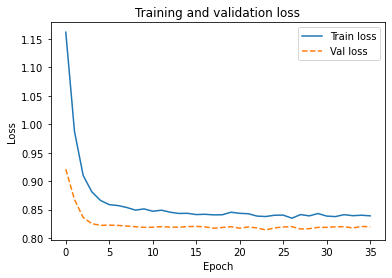

In [46]:
def plot_loss(history, metric, label='', title=''):
    plt.plot(history.epoch,  history.history[metric], label='Train '+label)  # semilogy
    plt.plot(history.epoch,  history.history['val_'+metric], label='Val '+label, linestyle="--")  # semilogy
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(training_history, 'loss', label="loss", title='Training and validation loss')

## 1.6.2. f1_score curve

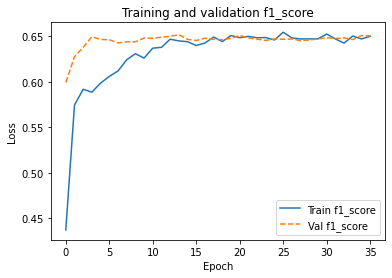

In [47]:
plot_loss(training_history, 'f1', label="f1_score", title='Training and validation f1_score')

## 1.6.3. other metrics

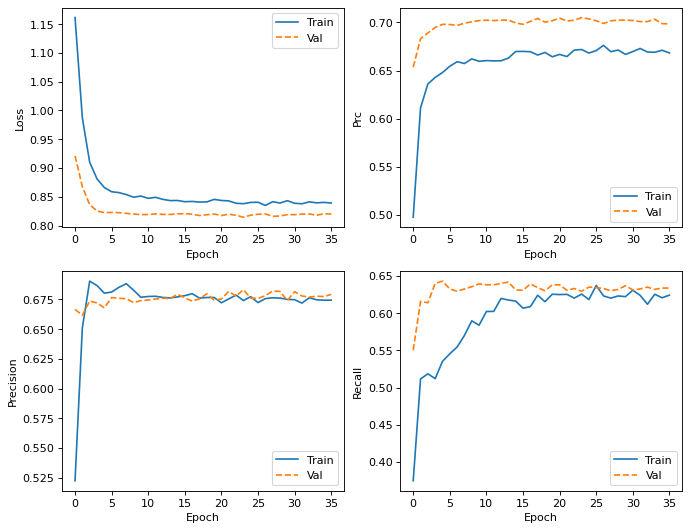

In [48]:
def plot_metrics(history):
    metrics = ['loss', 'prc', 'precision', 'recall']
    plt.figure(figsize=(10, 8), dpi=80)
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
#         if metric == 'loss':
#             plt.ylim([0, plt.ylim()[1]])
#         elif metric == 'auc':
#             plt.ylim([0.8,1])
#         else:
#             plt.ylim([0,1])
        plt.legend()


plot_metrics(training_history)


In [49]:
# def plot_cm(labels, predictions, p=0.5):
#     cm = confusion_matrix(labels, predictions > p)
#     plt.figure(figsize=(5,5))
#     sns.heatmap(cm, annot=True, fmt="d")
#     plt.title('Confusion matrix @{:.2f}'.format(p))
#     plt.ylabel('Actual label')
#     plt.xlabel('Predicted label')

#     print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
#     print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
#     print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
#     print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
#     print('Total Fraudulent Transactions: ', np.sum(cm[1]))


baseline_results = model.evaluate(foo.X_test, foo.y_test, batch_size=512, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

# BATCH_SIZE=200
# train_predictions_baseline = model.predict(foo.X_train, batch_size=BATCH_SIZE)
# test_predictions_baseline = model.predict(foo.X_test, batch_size=BATCH_SIZE)
# plot_cm(test_labels, test_predictions_baseline)

loss :  0.8306750655174255
tp :  1647.0
fp :  800.0
tn :  4454.0
fn :  980.0
accuracy :  0.7741403579711914
precision :  0.6730690598487854
recall :  0.6269509196281433
auc :  0.8079243898391724
prc :  0.6906067728996277
f1 :  0.6595966219902039



# 1.7 Generate a ROC-AUC curve and comment on your model accuracy and find the optimal threshold from the curve. (10 points)

In [50]:
y_train_labels = foo.y_train.argmax(axis=-1)
y_valid_labels = foo.y_valid.argmax(axis=-1)
y_test_labels = foo.y_test.argmax(axis=-1)
y_pred_labels = y_pred.argmax(axis=-1)

In [51]:
y_pred_labels

array([1, 1, 1, ..., 1, 1, 1])

ROC AUC score: 0.506684316563987


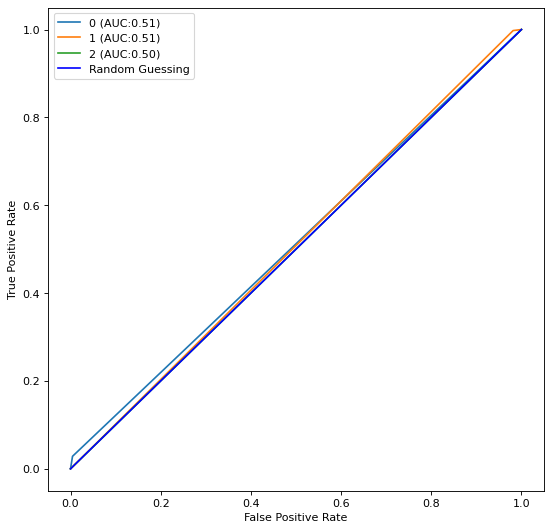

In [52]:
# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (8, 8), dpi=80)
target= [0,1,2]
print('ROC AUC score:', multiclass_roc_auc_score(y_test_labels, y_pred_labels))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [53]:
# from sklearn.metrics import roc_curve, precision_recall_curve
# def plot_prc(name, labels, predictions, **kwargs):
#     precision, recall, _ = precision_recall_curve(labels, predictions)

#     plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
#     plt.xlabel('Precision')
#     plt.ylabel('Recall')
#     plt.grid(True)
#     ax = plt.gca()
#     ax.set_aspect('equal')


# plot_prc("Train Baseline", y_train_labels, y_pred_labels)
# plot_prc("Test Baseline", y_test_labels, y_pred_labels, linestyle='--')
# plt.legend(loc='lower right');

# 1.8 Repeat the steps from 1.1 to 1.7 with sampling in training set. (you can do over sampling to increase the instances of majority class in training set) Compare and comment on the results you get from sampled data and original data distribution. (50 points) 

(You are expected to do some research on how to apply sampling over a dataset and which libraries usually employed to do so.)

In [72]:
class Foo:
    def __init__(self):
        self.traindf = pd.read_csv('./train.csv')
        self.traindf = self.traindf.drop(['ID', 'Segmentation'], axis=1)
        # self.traindf['source'] = 0
        self.testdf = pd.read_csv('./test.csv')
        self.testdf = self.testdf.drop(['ID'], axis=1)
        # self.testdf['source'] = 1
        # self.testdf = pd.merge(left=self.testdf, right=self.traindf[['ID', 'Segmentation']], how='left', on='ID')
        # self.df = pd.concat([self.traindf, self.testdf])
        self.traindf = self.fillna(self.traindf)
        self.testdf = self.fillna(self.testdf)

        self.X_train, self.y_train, self.n_classes = self.getXy(self.traindf)
        self.X_test, self.y_test, _ = self.getXy(self.testdf)

        self.X_train, self.X_valid, self.y_train, self.y_valid = \
            train_test_split(self.X_train, self.y_train, test_size=0.2, random_state=0, shuffle=True,
                             stratify=self.y_train)

        self.X_train.reset_index(drop=True, inplace=True)
        self.X_valid.reset_index(drop=True, inplace=True)
        self.X_test.reset_index(drop=True, inplace=True)

        print(self.X_train.shape, self.y_train.shape,
              self.X_valid.shape, self.y_valid.shape,
              self.X_test.shape, self.y_test.shape)
        pass

    @staticmethod
    def getXy(f):
        # f = self.df[self.df['source'] == c]
        y = f['Var_1']  # LabelEncoder().fit_transform()
        n = len(np.unique(y))
        y = to_categorical(y, n)
        x = f.drop(['Var_1'], axis=1)
        return x, y, n

    def fillna(self, f):
        f['Ever_Married'].fillna('Yes', inplace=True)
        f['Graduated'].fillna('Yes', inplace=True)
        f['Profession'].fillna('', inplace=True)
        f['Work_Experience'].fillna(f['Work_Experience'].mean(), inplace=True)
        f['Spending_Score'].fillna('Low', inplace=True)
        f['Family_Size'].fillna(f['Family_Size'].mean(), inplace=True)
        f['Var_1'].fillna('Cat_6', inplace=True)
        # f['Segmentation'].fillna(f['Segmentation'].mode().values[0])
        f.loc[(f['Var_1'] != 'Cat_4') & (f['Var_1'] != 'Cat_6'), ['Var_1']] = 'Other'
        f.loc[f['Var_1'] == 'Cat_4', ['Var_1']] = 0
        f.loc[f['Var_1'] == 'Cat_6', ['Var_1']] = 1
        f.loc[f['Var_1'] == 'Other', ['Var_1']] = 2
        return f

    def label_encoding(self, method='onehot'):
        if method == 'onehot':
            categorical_data = [var for var in self.X_train.columns if self.X_train[var].dtype == 'O']
            enc = ce.OneHotEncoder(cols=categorical_data)
            self.X_train = enc.fit_transform(self.X_train)
            self.X_valid = enc.transform(self.X_valid)
            self.X_test = enc.transform(self.X_test)
        elif method == 'labeling':
            for col in self.X_train.columns:
                if self.X_train[col].dtype == 'O':
                    le = LabelEncoder().fit(self.X_train[col])
                    self.X_train[col] = le.transform(self.X_train[col])
                    self.X_valid[col] = le.transform(self.X_valid[col])
                    self.X_test[col] = le.transform(self.X_test[col])
        else:
            pass
        pass

    def log_scaling(self):
        for col in self.X_train.columns:
            if self.X_train[col].dtype != 'O':
                self.X_train[col] = np.log(self.X_train[col].values + 1)
                self.X_valid[col] = np.log(self.X_valid[col].values + 1)
                self.X_test[col] = np.log(self.X_test[col].values + 1)

    def feature_scaling(self, plot=True):
        for col in self.X_train.columns:
            if self.X_train[col].dtype != 'O':
                ss = StandardScaler()
                self.X_train[col] = ss.fit_transform(self.X_train[[col]])
                self.X_valid[col] = ss.transform(self.X_valid[[col]])
                self.X_test[col] = ss.transform(self.X_test[[col]])

                if plot:
                    self.scaling_plot(self.X_train[col], 'X_train %s ' % col, 'r')
                    self.scaling_plot(self.X_valid[col], 'X_valid %s ' % col, 'g')
                    self.scaling_plot(self.X_test[col], 'X_test %s ' % col, 'b')
        pass

    @staticmethod
    def scaling_plot(tmp, title, color):
        plt.figure(figsize=(7, 2), dpi=70)
        sns.histplot(tmp, kde=True, color=color)
        plt.title("%s scaling: (%.2f, %.2f)" % (title, tmp.min(), tmp.max()))
        plt.show()

    @staticmethod
    def onehot_encoding(x_train, x_test):
        categorical_data = [var for var in x_train.columns if x_train[var].dtype == 'O']

        encoder = ce.OneHotEncoder(cols=categorical_data)
        x_train = encoder.fit_transform(x_train)
        x_test = encoder.transform(x_test)

        #         scaler = RobustScaler()
        #         x_train = scaler.fit_transform(x_train)
        #         x_test = scaler.transform(x_test)
        return x_train, x_test

    # see: https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras/45305384#45305384
    @staticmethod
    def f1(_y_true, _y_pred):
        def recall(t, p):
            true_positives = K.sum(K.round(K.clip(t * p, 0, 1)))
            possible_positives = K.sum(K.round(K.clip(t, 0, 1)))
            return true_positives / (possible_positives + K.epsilon())

        def precision(t, p):
            true_positives = K.sum(K.round(K.clip(t * p, 0, 1)))
            predicted_positives = K.sum(K.round(K.clip(p, 0, 1)))
            return true_positives / (predicted_positives + K.epsilon())

        precision = precision(_y_true, _y_pred)
        recall = recall(_y_true, _y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def make_model(self, l0=256, l1=256, dropout=0.5, l2=64, l3=16, learning_rate=0.01):
        METRICS = [
            metrics.TruePositives(name='tp'),
            metrics.FalsePositives(name='fp'),
            metrics.TrueNegatives(name='tn'),
            metrics.FalseNegatives(name='fn'),
            metrics.BinaryAccuracy(name='accuracy'),
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc'),
            metrics.AUC(name='prc', curve='PR'),  # precision-recall curve
            self.f1
        ]
        input_shape = np.shape(self.X_train)[0]
        print("input_shape : ", input_shape)
        mdl = Sequential()
        mdl.add(layers.ReLU(l0))
        mdl.add(layers.ReLU(l1))
        # mdl.add(layers.Dropout(dropout))
        mdl.add(layers.ReLU(l2))
        mdl.add(layers.ReLU(l3))
        mdl.add(layers.ReLU(self.n_classes))
        mdl.add(layers.Dense(self.n_classes, activation='softmax', bias_initializer=None))  # self.n_classes
        mdl.compile(loss=losses.categorical_crossentropy, optimizer=Adam(lr=learning_rate), metrics=METRICS)
        return mdl

    def training(self, mdl, class_weight=None, verbose=2):
        # early_stopping
        early_stopping = EarlyStopping(monitor='f1', verbose=2, patience=10,
                                       mode='max',
                                       restore_best_weights=True)

        # training model
        _history = mdl.fit(self.X_train, self.y_train, batch_size=512, epochs=100, verbose=verbose,
                           callbacks=early_stopping,
                           validation_data=(self.X_valid, self.y_valid),
                           class_weight=class_weight  # The class weights
                           )
        return _history

    def predict(self, mdl):
        _y_pred = mdl.predict(self.X_test)
        shape1 = np.shape(_y_pred)[1]
        result = []
        for idx in range(len(_y_pred)):
            idx = np.argmax(_y_pred[idx])
            arr = [0] * shape1
            arr[idx] = 1
            result.append(arr)
        result = np.array(result)
        pred_result = np.array([result.T[0].sum(), result.T[1].sum(), result.T[2].sum()])
        test_labels = np.array([self.y_test.T[0].sum(), self.y_test.T[1].sum(), self.y_test.T[2].sum()])
        # print(_y_pred, result)
        print(pred_result, test_labels)
        print("accuracy : ", accuracy_score(self.y_test, result))
        print("precision : ", precision_score(self.y_test, result, average=None))
        print("recall : ", recall_score(self.y_test, result, average=None))
        return _y_pred

    @staticmethod
    def plot_metric(history, metric, label='', title=''):
        plt.plot(history.epoch, history.history[metric], label='Train ' + label)  # semilogy
        plt.plot(history.epoch, history.history['val_' + metric], label='Val ' + label, linestyle="--")  # semilogy
        plt.title(title)
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.legend()
        plt.show()
        pass

    @staticmethod
    def plot_metrics(history):
        _metrics = ['precision', 'recall']  # 'loss', 'prc',
        plt.figure(figsize=(10, 8), dpi=80)
        for n, metric in enumerate(_metrics):
            name = metric.replace("_", " ").capitalize()
            plt.subplot(2, 2, n + 1)
            plt.plot(history.epoch, history.history[metric], label='Train')
            plt.plot(history.epoch, history.history['val_' + metric], linestyle="--", label='Val')
            plt.xlabel('Epoch')
            plt.ylabel(name)
            #         if metric == 'loss':
            #             plt.ylim([0, plt.ylim()[1]])
            #         elif metric == 'auc':
            #             plt.ylim([0.8,1])
            #         else:
            #             plt.ylim([0,1])
            plt.legend()
        pass

    @staticmethod
    def get_y_label(y_categorical):
        return y_categorical.argmax(axis=-1)

    def plot_confusion_matrix(self, _y_pred):
        mat = confusion_matrix(self.get_y_label(self.y_test), self.get_y_label(_y_pred), labels=[0, 1, 2])
        sns.heatmap(mat, annot=True, fmt=".0f")
        pass

    def get_class_weight(self, categorical_y):
        arr = compute_class_weight(class_weight="balanced",
                                   classes=np.unique(self.get_y_label(categorical_y)),
                                   y=self.get_y_label(categorical_y))
        return {0: arr[0], 1: arr[1], 2: arr[2]}

    # function for scoring roc auc score for multi-class
    def plot_multiclass_roc_auc_curve(self, _y_test, _y_pred, average="macro"):
        _y_test = self.get_y_label(_y_test)
        _y_pred = self.get_y_label(_y_pred)
        # set plot figure size
        fig, c_ax = plt.subplots(1, 1, figsize=(8, 8), dpi=80)
        target = [0, 1, 2]
        lb = LabelBinarizer()
        lb.fit(_y_test)
        _y_test = lb.transform(_y_test)
        _y_pred = lb.transform(_y_pred)

        fpr, tpr = None, None
        for (idx, c_label) in enumerate(target):
            fpr, tpr, thresholds = roc_curve(_y_test[:, idx].astype(int), _y_pred[:, idx])
            c_ax.plot(fpr, tpr, label='%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))
        c_ax.plot(fpr, tpr, 'b-', label='Random Guessing')
        c_ax.legend()
        c_ax.set_xlabel('False Positive Rate')
        c_ax.set_ylabel('True Positive Rate')
        plt.show()
        return roc_auc_score(_y_test, _y_pred, average=average)

    def over_sampling(self, s0=2, s2=2, plot=False):
        tmp = pd.concat([self.X_train, pd.DataFrame(self.y_train)], axis=1)
        scales = tmp[[0, 1, 2]].sum()
        if plot:
            plt.bar(range(len(scales)), scales)
            plt.show()
        oversampling_0 = tmp[tmp[0] == 1].sample(int(scales[0] * s0), replace=True)
        oversampling_2 = tmp[tmp[2] == 1].sample(int(scales[2] * s2), replace=True)

        oversampling_traindf = pd.concat([oversampling_0, tmp[tmp[1] == 1], oversampling_2])
        if plot:
            scales = oversampling_traindf[[0, 1, 2]].sum()
            plt.bar(range(len(scales)), scales)
            plt.show()
        y_train = oversampling_traindf[[0]]
        y_train[1] = oversampling_traindf[[1]]
        y_train[2] = oversampling_traindf[[2]]
        self.y_train = y_train.values

        oversampling_traindf.pop(0)
        oversampling_traindf.pop(1)
        oversampling_traindf.pop(2)
        self.X_train = oversampling_traindf.reset_index(drop=True, inplace=False)

        print(self.get_class_weight(self.y_train))


foo = Foo()
foo.label_encoding(method='onehot')  # 'onehot', 'labeling'
foo.log_scaling()
foo.feature_scaling(plot=False)

(6454, 8) (6454, 3) (1614, 8) (1614, 3) (2627, 8) (2627, 3)


input_shape :  6454
Epoch 1/100
13/13 - 1s - loss: 1.4062 - tp: 1789.0000 - fp: 3420.0000 - tn: 9488.0000 - fn: 4665.0000 - accuracy: 0.5824 - precision: 0.3434 - recall: 0.2772 - auc: 0.5363 - prc: 0.3455 - f1: 0.3111 - val_loss: 1.0237 - val_tp: 668.0000 - val_fp: 570.0000 - val_tn: 2658.0000 - val_fn: 946.0000 - val_accuracy: 0.6869 - val_precision: 0.5396 - val_recall: 0.4139 - val_auc: 0.7059 - val_prc: 0.5380 - val_f1: 0.4812 - 1s/epoch - 106ms/step
Epoch 2/100
13/13 - 0s - loss: 0.9597 - tp: 3215.0000 - fp: 2036.0000 - tn: 10872.0000 - fn: 3239.0000 - accuracy: 0.7276 - precision: 0.6123 - recall: 0.4981 - auc: 0.7497 - prc: 0.6026 - f1: 0.5508 - val_loss: 0.8969 - val_tp: 958.0000 - val_fp: 461.0000 - val_tn: 2767.0000 - val_fn: 656.0000 - val_accuracy: 0.7693 - val_precision: 0.6751 - val_recall: 0.5936 - val_auc: 0.7872 - val_prc: 0.6585 - val_f1: 0.6325 - 39ms/epoch - 3ms/step
Epoch 3/100
13/13 - 0s - loss: 0.8849 - tp: 3837.0000 - fp: 1912.0000 - tn: 10996.0000 - fn: 2617.0

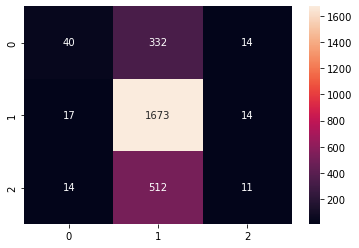

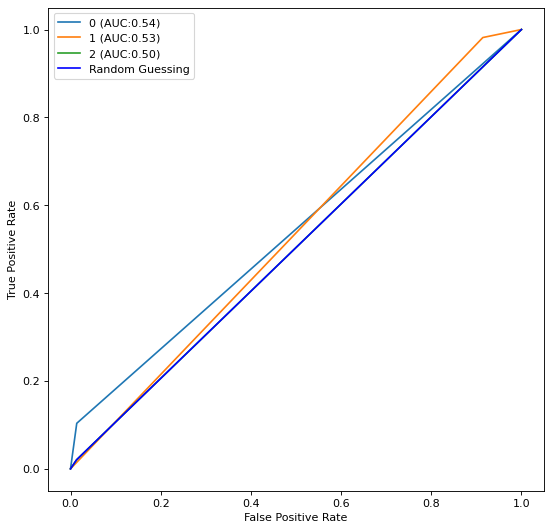

0.5273798087552218

In [55]:
model = foo.make_model()
training_history = foo.training(model, class_weight=None)
y_pred = foo.predict(model)
foo.plot_confusion_matrix(y_pred)
foo.plot_multiclass_roc_auc_curve(foo.y_test, y_pred)

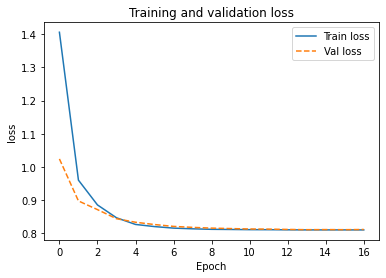

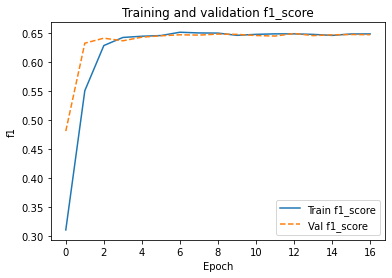

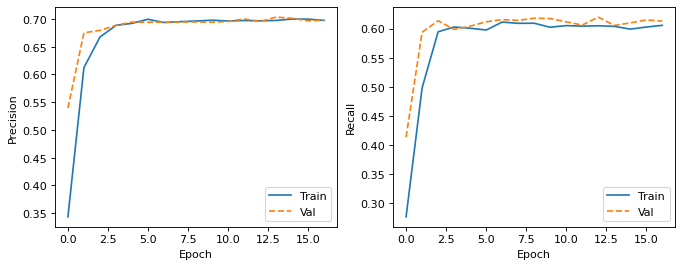

In [56]:
foo.plot_metric(training_history, 'loss', label="loss", title='Training and validation loss')
foo.plot_metric(training_history, 'f1', label="f1_score", title='Training and validation f1_score')
foo.plot_metrics(training_history)

### 1.8.1. applying class weighting

input_shape :  6454
Restoring model weights from the end of the best epoch: 23.
Epoch 33: early stopping
83/83 [==============================] - 0s 621us/step
[ 809 1099  719] [ 386. 1704.  537.]
accuracy :  0.4796345641416064
precision :  [0.26205192 0.78616924 0.25591099]
recall :  [0.5492228  0.50704225 0.34264432]


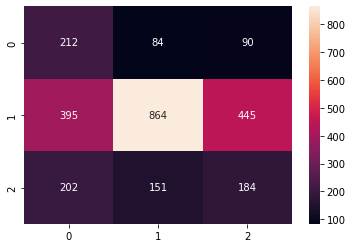

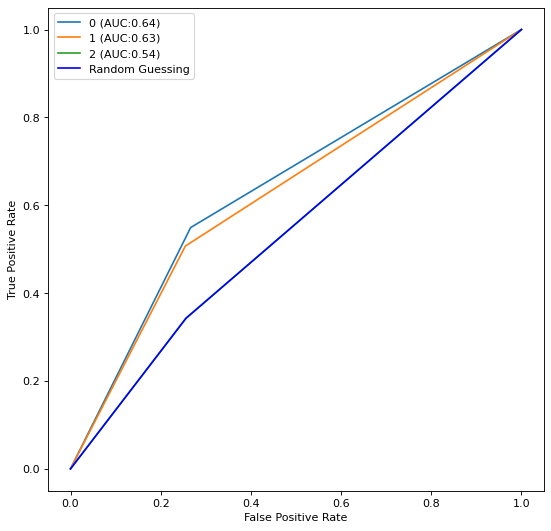

0.6036541718456317

In [57]:
model = foo.make_model()
weighted_history = foo.training(model, class_weight=foo.get_class_weight(foo.y_train), verbose=0)
y_pred = foo.predict(model)
foo.plot_confusion_matrix(y_pred)
foo.plot_multiclass_roc_auc_curve(foo.y_test, y_pred)

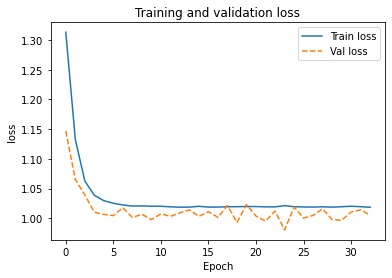

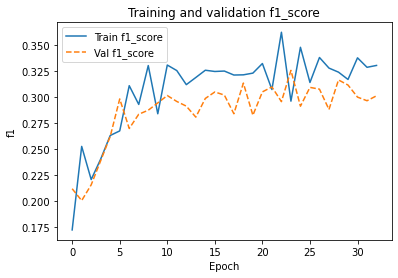

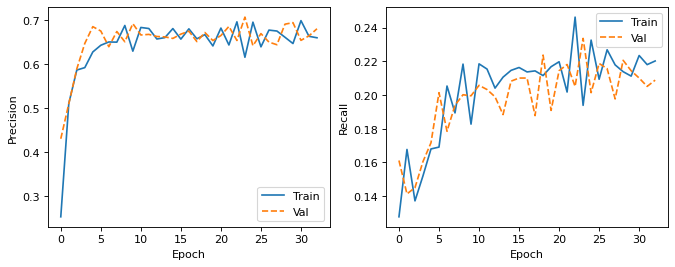

In [58]:
foo.plot_metric(weighted_history, 'loss', label="loss", title='Training and validation loss')
foo.plot_metric(weighted_history, 'f1', label="f1_score", title='Training and validation f1_score')
foo.plot_metrics(weighted_history)

### 1.8.2 over sampling

In [59]:
tmp = pd.concat([foo.X_train, pd.DataFrame(foo.y_train)], axis=1)
scales = tmp[[0,1,2]].sum()

scales[0],scales[1],scales[2]

(871.0, 4251.0, 1332.0)

In [60]:
oversampling_0 = tmp[tmp[0]==1].sample(int(scales[0]*2), replace=True)
oversampling_0


,Gender_1,Gender_2,Ever_Married_1,Ever_Married_2,Age,Graduated_1,Graduated_2,Profession_1,Profession_2,Profession_3,Profession_4,Profession_5,Profession_6,Profession_7,Profession_8,Profession_9,Profession_10,Work_Experience,Spending_Score_1,Spending_Score_2,Spending_Score_3,Family_Size,0,1,2
2347,0.912689,-0.912689,-0.833845,0.833845,0.030169,1.30227,-1.30227,-0.307033,-0.438286,-0.312739,-0.177903,-0.368873,3.555956,-0.672529,-0.290416,-0.192666,-0.122878,-0.310872,0.805837,-0.418270,-0.569358,2.112321,1.0,0.0,0.0
2485,0.912689,-0.912689,-0.833845,0.833845,-1.250745,1.30227,-1.30227,-0.307033,-0.438286,-0.312739,-0.177903,2.710957,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,-0.310872,-1.240945,-0.418270,1.756363,-0.468227,1.0,0.0,0.0
4702,0.912689,-0.912689,-0.833845,0.833845,-0.100147,1.30227,-1.30227,-0.307033,-0.438286,-0.312739,-0.177903,-0.368873,3.555956,-0.672529,-0.290416,-0.192666,-0.122878,1.545017,-1.240945,-0.418270,1.756363,0.875748,1.0,0.0,0.0
2893,0.912689,-0.912689,-0.833845,0.833845,0.386824,-0.76789,0.76789,-0.307033,-0.438286,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,5.190317,-0.122878,-1.166150,0.805837,-0.418270,-0.569358,-0.468227,1.0,0.0,0.0
6415,0.912689,-0.912689,1.199263,-1.199263,-1.464534,1.30227,-1.30227,-0.307033,2.281615,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,-0.310872,0.805837,-0.418270,-0.569358,1.355434,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,0.912689,-0.912689,1.199263,-1.199263,-0.613962,-0.76789,0.76789,3.256979,-0.438286,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,-1.166150,0.805837,-0.418270,-0.569358,0.875748,1.0,0.0,0.0
1265,0.912689,-0.912689,1.199263,-1.199263,-1.696937,1.30227,-1.30227,-0.307033,2.281615,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,-0.310872,0.805837,-0.418270,-0.569358,1.355434,1.0,0.0,0.0
616,0.912689,-0.912689,-0.833845,0.833845,0.441897,1.30227,-1.30227,-0.307033,-0.438286,-0.312739,-0.177903,-0.368873,3.555956,-0.672529,-0.290416,-0.192666,-0.122878,1.044711,-1.240945,2.390799,-0.569358,-0.468227,1.0,0.0,0.0
701,0.912689,-0.912689,1.199263,-1.199263,-0.959079,-0.76789,0.76789,-0.307033,-0.438286,3.197553,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,-1.166150,0.805837,-0.418270,-0.569358,1.355434,1.0,0.0,0.0


In [61]:
oversampling_2 = tmp[tmp[2]==1].sample(int(scales[2]*1.5), replace=True)
oversampling_2

,Gender_1,Gender_2,Ever_Married_1,Ever_Married_2,Age,Graduated_1,Graduated_2,Profession_1,Profession_2,Profession_3,Profession_4,Profession_5,Profession_6,Profession_7,Profession_8,Profession_9,Profession_10,Work_Experience,Spending_Score_1,Spending_Score_2,Spending_Score_3,Family_Size,0,1,2
992,0.912689,-0.912689,-0.833845,0.833845,0.495858,-0.76789,0.76789,-0.307033,-0.438286,-0.312739,-0.177903,-0.368873,3.555956,-0.672529,-0.290416,-0.192666,-0.122878,-0.310872,-1.240945,2.390799,-0.569358,1.355434,0.0,0.0,1.0
3254,0.912689,-0.912689,-0.833845,0.833845,-0.381559,-0.76789,0.76789,-0.307033,-0.438286,-0.312739,-0.177903,-0.368873,-0.281218,1.486925,-0.290416,-0.192666,-0.122878,-0.310872,-1.240945,-0.418270,1.756363,0.875748,0.0,0.0,1.0
4295,-1.095663,1.095663,-0.833845,0.833845,1.026978,-0.76789,0.76789,-0.307033,-0.438286,3.197553,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,0.819744,-1.240945,-0.418270,1.756363,0.875748,0.0,0.0,1.0
3293,-1.095663,1.095663,-0.833845,0.833845,0.386824,1.30227,-1.30227,-0.307033,-0.438286,3.197553,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,1.792625,0.805837,-0.418270,-0.569358,-0.468227,0.0,0.0,1.0
729,-1.095663,1.095663,1.199263,-1.199263,-0.780950,1.30227,-1.30227,-0.307033,-0.438286,-0.312739,-0.177903,-0.368873,3.555956,-0.672529,-0.290416,-0.192666,-0.122878,0.428599,0.805837,-0.418270,-0.569358,-1.535000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,0.912689,-0.912689,1.199263,-1.199263,-1.149942,-0.76789,0.76789,-0.307033,-0.438286,3.197553,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,-0.310872,0.805837,-0.418270,-0.569358,0.288661,0.0,0.0,1.0
2561,-1.095663,1.095663,1.199263,-1.199263,0.495858,-0.76789,0.76789,-0.307033,-0.438286,-0.312739,-0.177903,-0.368873,-0.281218,1.486925,-0.290416,-0.192666,-0.122878,-0.310872,0.805837,-0.418270,-0.569358,-0.468227,0.0,0.0,1.0
4843,0.912689,-0.912689,1.199263,-1.199263,-0.034194,-0.76789,0.76789,-0.307033,-0.438286,-0.312739,-0.177903,-0.368873,-0.281218,1.486925,-0.290416,-0.192666,-0.122878,1.545017,0.805837,-0.418270,-0.569358,-0.468227,0.0,0.0,1.0
5007,-1.095663,1.095663,1.199263,-1.199263,0.030169,-0.76789,0.76789,-0.307033,-0.438286,-0.312739,-0.177903,-0.368873,-0.281218,1.486925,-0.290416,-0.192666,-0.122878,0.189433,0.805837,-0.418270,-0.569358,0.188185,0.0,0.0,1.0


In [62]:
oversampling_1 = tmp[tmp[1]==1]
oversampling_1

,Gender_1,Gender_2,Ever_Married_1,Ever_Married_2,Age,Graduated_1,Graduated_2,Profession_1,Profession_2,Profession_3,Profession_4,Profession_5,Profession_6,Profession_7,Profession_8,Profession_9,Profession_10,Work_Experience,Spending_Score_1,Spending_Score_2,Spending_Score_3,Family_Size,0,1,2
0,0.912689,-0.912689,1.199263,-1.199263,-0.959079,1.30227,-1.30227,3.256979,-0.438286,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,0.819744,0.805837,-0.418270,-0.569358,0.288661,0.0,1.0,0.0
1,0.912689,-0.912689,1.199263,-1.199263,-1.250745,-0.76789,0.76789,-0.307033,2.281615,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,-0.310872,0.805837,-0.418270,-0.569358,0.875748,0.0,1.0,0.0
2,-1.095663,1.095663,-0.833845,0.833845,0.441897,-0.76789,0.76789,-0.307033,-0.438286,3.197553,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,-1.166150,-1.240945,2.390799,-0.569358,0.875748,0.0,1.0,0.0
4,0.912689,-0.912689,-0.833845,0.833845,-0.959079,-0.76789,0.76789,-0.307033,2.281615,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,1.545017,-1.240945,2.390799,-0.569358,-0.468227,0.0,1.0,0.0
9,0.912689,-0.912689,1.199263,-1.199263,-1.464534,1.30227,-1.30227,-0.307033,2.281615,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,-1.166150,0.805837,-0.418270,-0.569358,0.875748,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6448,0.912689,-0.912689,1.199263,-1.199263,-1.149942,1.30227,-1.30227,-0.307033,-0.438286,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,5.190317,-0.122878,-0.310872,0.805837,-0.418270,-0.569358,1.355434,0.0,1.0,0.0
6449,-1.095663,1.095663,1.199263,-1.199263,-1.578209,1.30227,-1.30227,-0.307033,2.281615,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,-0.310872,0.805837,-0.418270,-0.569358,0.875748,0.0,1.0,0.0
6450,-1.095663,1.095663,-0.833845,0.833845,0.798552,-0.76789,0.76789,-0.307033,-0.438286,-0.312739,-0.177903,-0.368873,-0.281218,1.486925,-0.290416,-0.192666,-0.122878,-0.310872,-1.240945,-0.418270,1.756363,0.875748,0.0,1.0,0.0
6451,-1.095663,1.095663,-0.833845,0.833845,0.093018,1.30227,-1.30227,3.256979,-0.438286,-0.312739,-0.177903,-0.368873,-0.281218,-0.672529,-0.290416,-0.192666,-0.122878,-0.310872,0.805837,-0.418270,-0.569358,-1.535000,0.0,1.0,0.0


In [63]:
foo = Foo()
foo.label_encoding(method='onehot')  # 'onehot', 'labeling'
foo.log_scaling()
foo.feature_scaling(plot=False)

tmp = pd.concat([foo.X_train, pd.DataFrame(foo.y_train)], axis=1)
scales = tmp[[0,1,2]].sum()
oversampling_0 = tmp[tmp[0]==1].sample(int(scales[0]*4), replace=True)
oversampling_2 = tmp[tmp[2]==1].sample(int(scales[2]*2.5), replace=True)
oversampling_1 = tmp[tmp[1]==1]

oversampling_traindf = pd.concat([oversampling_0, tmp[tmp[1]==1], oversampling_2])
y_train = oversampling_traindf[[0]]
y_train[1] = oversampling_traindf[[1]]
y_train[2] = oversampling_traindf[[2]]
foo.y_train = y_train.values

oversampling_traindf.pop(0)
oversampling_traindf.pop(1)
oversampling_traindf.pop(2)
foo.X_train = oversampling_traindf.reset_index(drop=True, inplace=False)

print(foo.get_class_weight(foo.y_train))

(6454, 8) (6454, 3) (1614, 8) (1614, 3) (2627, 8) (2627, 3)
{0: 1.0586490623804057, 1: 0.8676389869050419, 2: 1.1076076076076076}


input_shape :  11065
Restoring model weights from the end of the best epoch: 12.
Epoch 22: early stopping
83/83 [==============================] - 0s 604us/step
[710 997 920] [ 386. 1704.  537.]
accuracy :  0.45755614769699277
precision :  [0.26619718 0.79438315 0.24021739]
recall :  [0.48963731 0.46478873 0.41154562]


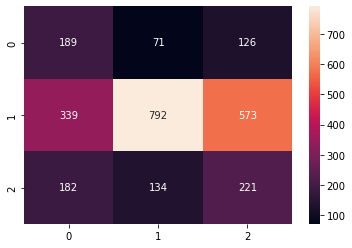

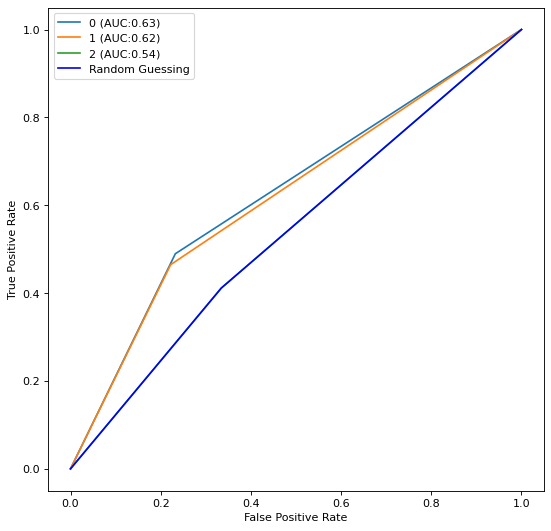

0.5961557602997557

In [64]:
# build with weights
model = foo.make_model()
weighted_history = foo.training(model, class_weight=foo.get_class_weight(foo.y_train), verbose=0)
y_pred = foo.predict(model)
foo.plot_confusion_matrix(y_pred)
foo.plot_multiclass_roc_auc_curve(foo.y_test, y_pred)

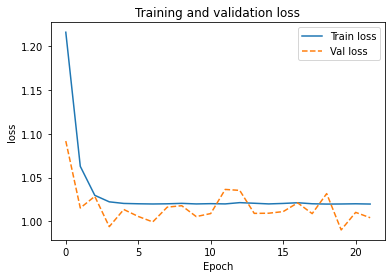

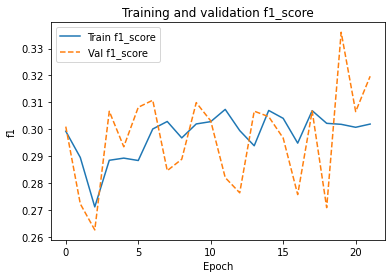

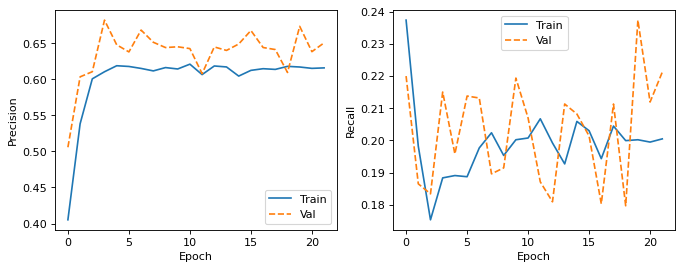

In [65]:
# plots
foo.plot_metric(weighted_history, 'loss', label="loss", title='Training and validation loss')
foo.plot_metric(weighted_history, 'f1', label="f1_score", title='Training and validation f1_score')
foo.plot_metrics(weighted_history)

# Conclusion

In [66]:
foo = Foo()
foo.label_encoding(method='onehot')  # 'onehot', 'labeling'
foo.log_scaling()
foo.feature_scaling(plot=False)

(6454, 8) (6454, 3) (1614, 8) (1614, 3) (2627, 8) (2627, 3)


### Part 1, baseline. Training model without other process

Most of the prediction results are class2, because of the imbalance classes.

input_shape :  6454
Restoring model weights from the end of the best epoch: 6.
Epoch 16: early stopping
83/83 [==============================] - 0s 622us/step
[  86 2535    6] [ 386. 1704.  537.]
accuracy :  0.6596878568709554
precision :  [0.55813953 0.66311637 0.66666667]
recall :  [0.12435233 0.98650235 0.00744879]


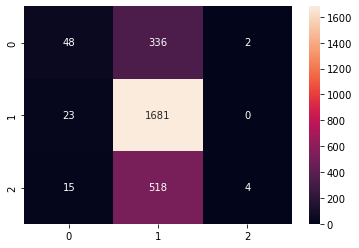

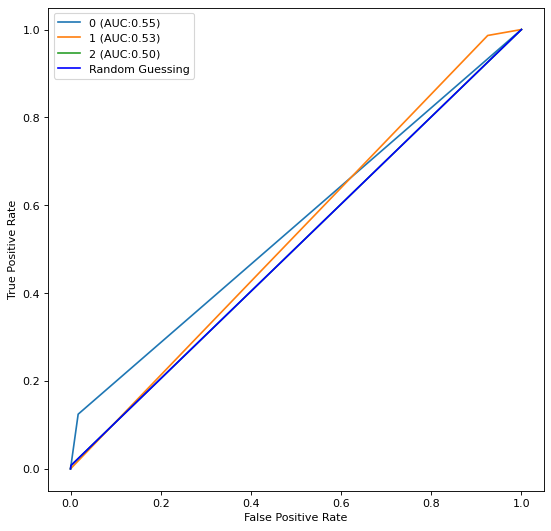

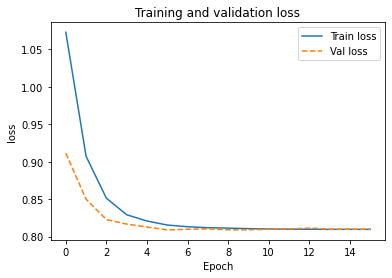

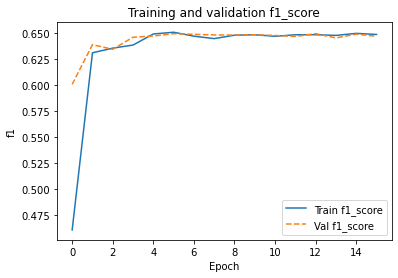

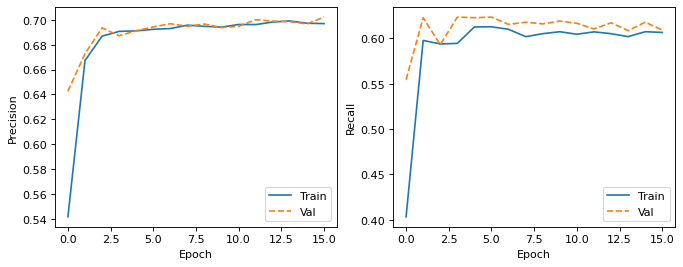

In [67]:
# build without class_weight
model = foo.make_model(l0=1024, l1=256, l2=16, l3=16)
training_history = foo.training(model, class_weight=None, verbose=0)
y_pred = foo.predict(model)
foo.plot_confusion_matrix(y_pred)
foo.plot_multiclass_roc_auc_curve(foo.y_test, y_pred)

# plots
foo.plot_metric(training_history, 'loss', label="loss", title='Training and validation loss')
foo.plot_metric(training_history, 'f1', label="f1_score", title='Training and validation f1_score')
foo.plot_metrics(training_history)

### Part 2, training model + class_weight

With applying class_weight, model is able to give out more prediction on rare labels.

input_shape :  6454
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
83/83 [==============================] - 0s 583us/step
[677 970 980] [ 386. 1704.  537.]
accuracy :  0.4358583936048725
precision :  [0.22895126 0.76597938 0.25204082]
recall :  [0.4015544  0.43603286 0.45996276]


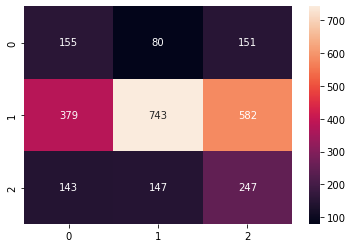

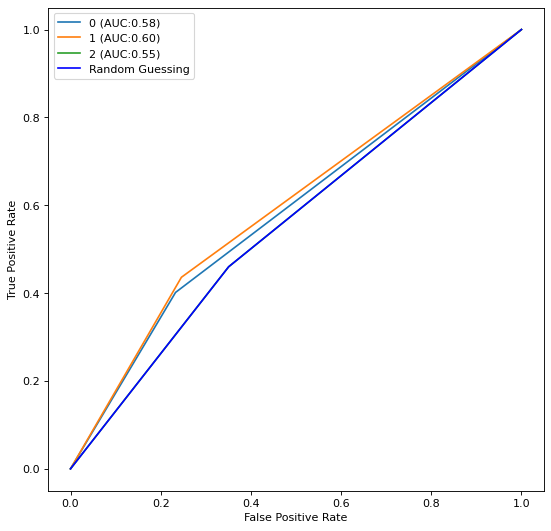

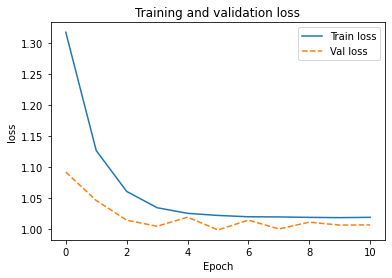

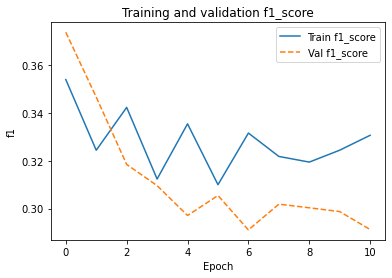

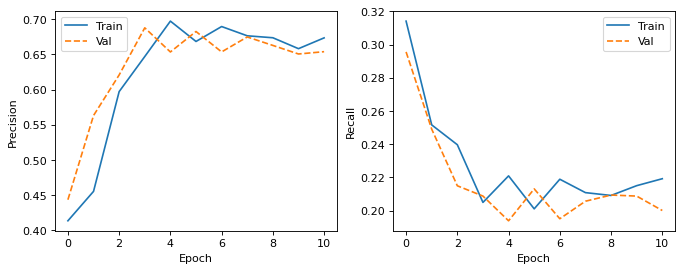

In [68]:
# build with class_weight
model = foo.make_model(l0=1024, l1=256, l2=16, l3=16)
training_history = foo.training(model, class_weight=foo.get_class_weight(foo.y_train), verbose=0)
y_pred = foo.predict(model)
foo.plot_confusion_matrix(y_pred)
foo.plot_multiclass_roc_auc_curve(foo.y_test, y_pred)

# plots
foo.plot_metric(training_history, 'loss', label="loss", title='Training and validation loss')
foo.plot_metric(training_history, 'f1', label="f1_score", title='Training and validation f1_score')
foo.plot_metrics(training_history)

### Part 3, training model + class_weight ( without over_sampling)

Oversampling 3 times of class 0 and class 2. This triggers a new class_weight: {0: 1.03, 1: 0.95, 2: 1.01} compare to the original class_weight {0: 2.47, 1: 0.51, 2: 1.62}.

This oversampling process will also improve the predicting result compare to the baseline in Part 1.

(6454, 8) (6454, 3) (1614, 8) (1614, 3) (2627, 8) (2627, 3)


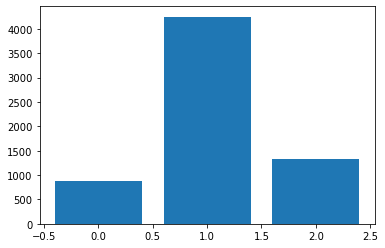

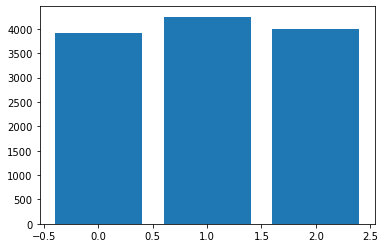

{0: 1.0347877859998298, 1: 0.9539716145220732, 2: 1.0148481815148482}


(12166, 22)

In [99]:
# a few over sampling
foo = Foo()
foo.label_encoding(method='onehot')  # 'onehot', 'labeling'
foo.log_scaling()
foo.feature_scaling(plot=False)
foo.over_sampling(s0=4.5, s2=3, plot=True)
foo.X_train.shape

input_shape :  12166
Restoring model weights from the end of the best epoch: 4.
Epoch 14: early stopping
83/83 [==============================] - 0s 579us/step
[ 695 1195  737] [ 386. 1704.  537.]
accuracy :  0.49904834411876664
precision :  [0.27625899 0.7790795  0.2550882 ]
recall :  [0.49740933 0.5463615  0.35009311]


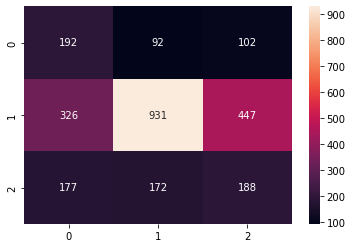

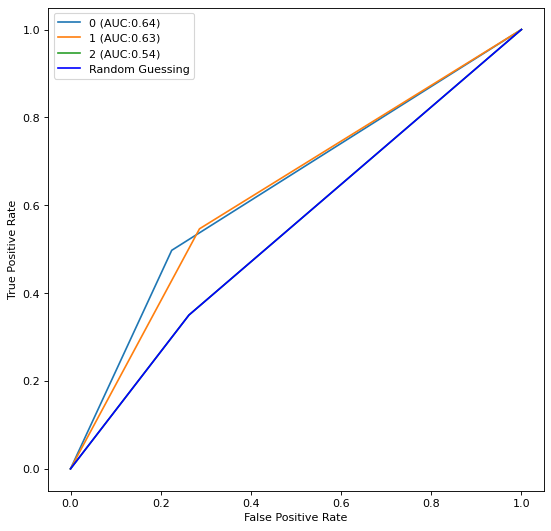

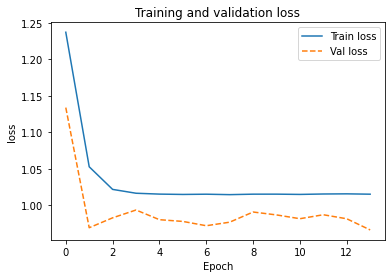

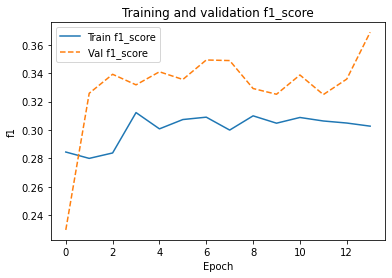

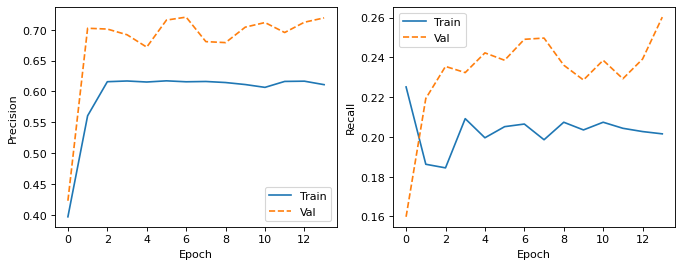

In [100]:
# build with class_weight
model = foo.make_model(l0=1024, l1=256, l2=16, l3=16, learning_rate=0.01)
training_history = foo.training(model, class_weight=None, verbose=0)  # foo.get_class_weight(foo.y_train)
y_pred = foo.predict(model)
foo.plot_confusion_matrix(y_pred)
foo.plot_multiclass_roc_auc_curve(foo.y_test, y_pred)

# plots
foo.plot_metric(training_history, 'loss', label="loss", title='Training and validation loss')
foo.plot_metric(training_history, 'f1', label="f1_score", title='Training and validation f1_score')
foo.plot_metrics(training_history)